# Proyecto Boosting Algorithms - Luis Alpizar

##  Predecir en base a medidas diagnósticas si un paciente tiene o no diabetes

## Paso 0: Importar Librerias

In [1]:
# Importacion de Librerias
# Registros y serialización
import logging
import pickle

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    GridSearchCV
)

# Pipelines
from sklearn.pipeline import Pipeline

# Preprocesamiento
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)

# Árboles de decisión
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree

)
#Random Forest
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier # CArga de libreria para usar algoritmo de Gradient Boosting

# Métricas
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)

# Inspección
from sklearn.inspection import permutation_importance

# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

## Paso 1: Carga del dataset

In [2]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw = pd.read_csv(url)
df_raw.info()
df_raw.sample(10, random_state= 2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0



## Paso 2: Data preprocessing

In [3]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()

In [4]:
display(df_baking.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df_baking.isna().sum()
df_baking.isnull().sum()

,0
pregnancies,0
glucose,0
bloodpressure,0
skinthickness,0
insulin,0
bmi,0
diabetespedigreefunction,0
age,0
outcome,0


In [6]:
df_y = df_baking['outcome']
df_y.value_counts()

,count
outcome,
0,500
1,268


In [7]:
df = df_baking.copy()



## Paso 3: Exploratory Data Analysis

In [8]:
#División de los datos en entrenamiento y prueba
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               614 non-null    int64  
 1   glucose                   614 non-null    int64  
 2   bloodpressure             614 non-null    int64  
 3   skinthickness             614 non-null    int64  
 4   insulin                   614 non-null    int64  
 5   bmi                       614 non-null    float64
 6   diabetespedigreefunction  614 non-null    float64
 7   age                       614 non-null    int64  
 8   outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [9]:
display(df_train.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,614.0,3.762215,3.360184,0.000,1.00000,3.00,6.0000,17.00
glucose,614.0,120.623779,30.987291,0.000,99.25000,117.00,139.0000,199.00
bloodpressure,614.0,69.148208,18.293846,0.000,62.00000,70.00,80.0000,122.00
skinthickness,614.0,20.910423,15.980416,0.000,0.00000,23.00,32.0000,99.00
insulin,614.0,82.547231,117.208088,0.000,0.00000,44.00,130.0000,846.00
bmi,614.0,31.874430,7.751197,0.000,27.30000,32.00,36.5000,67.10
diabetespedigreefunction,614.0,0.477060,0.336851,0.078,0.24425,0.38,0.6355,2.42
age,614.0,32.583062,11.308896,21.000,24.00000,29.00,39.0000,81.00
outcome,614.0,0.333876,0.471981,0.000,0.00000,0.00,1.0000,1.00


Analisis univariado

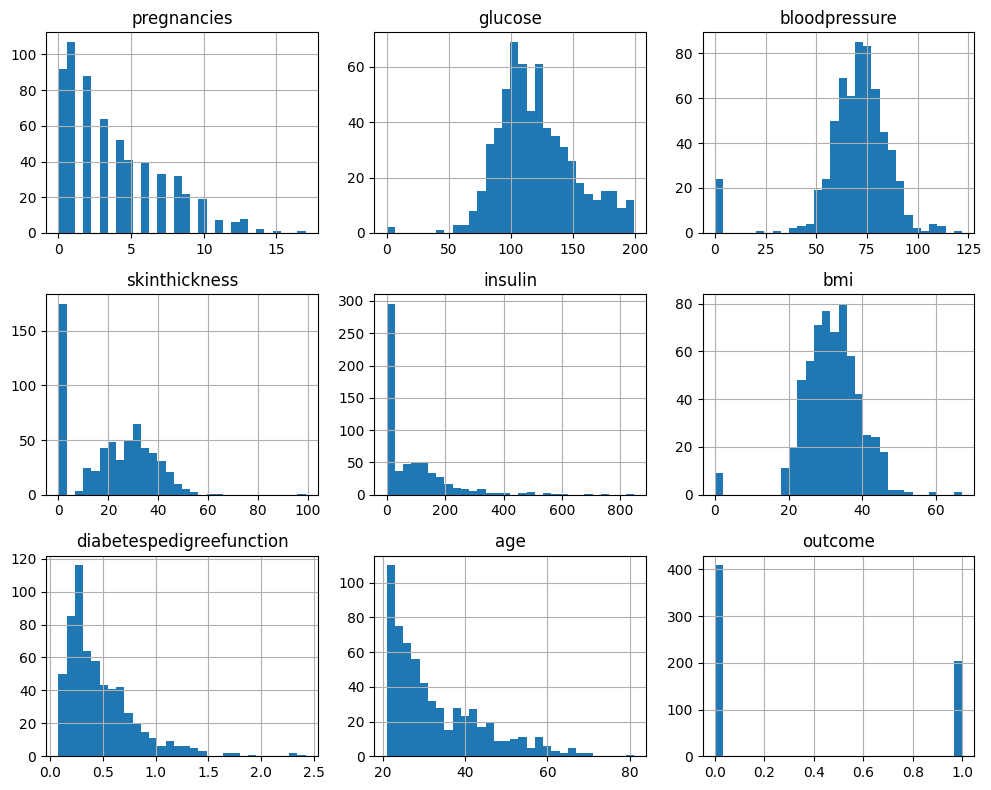

In [10]:
df_train.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

- Analisis bivariado

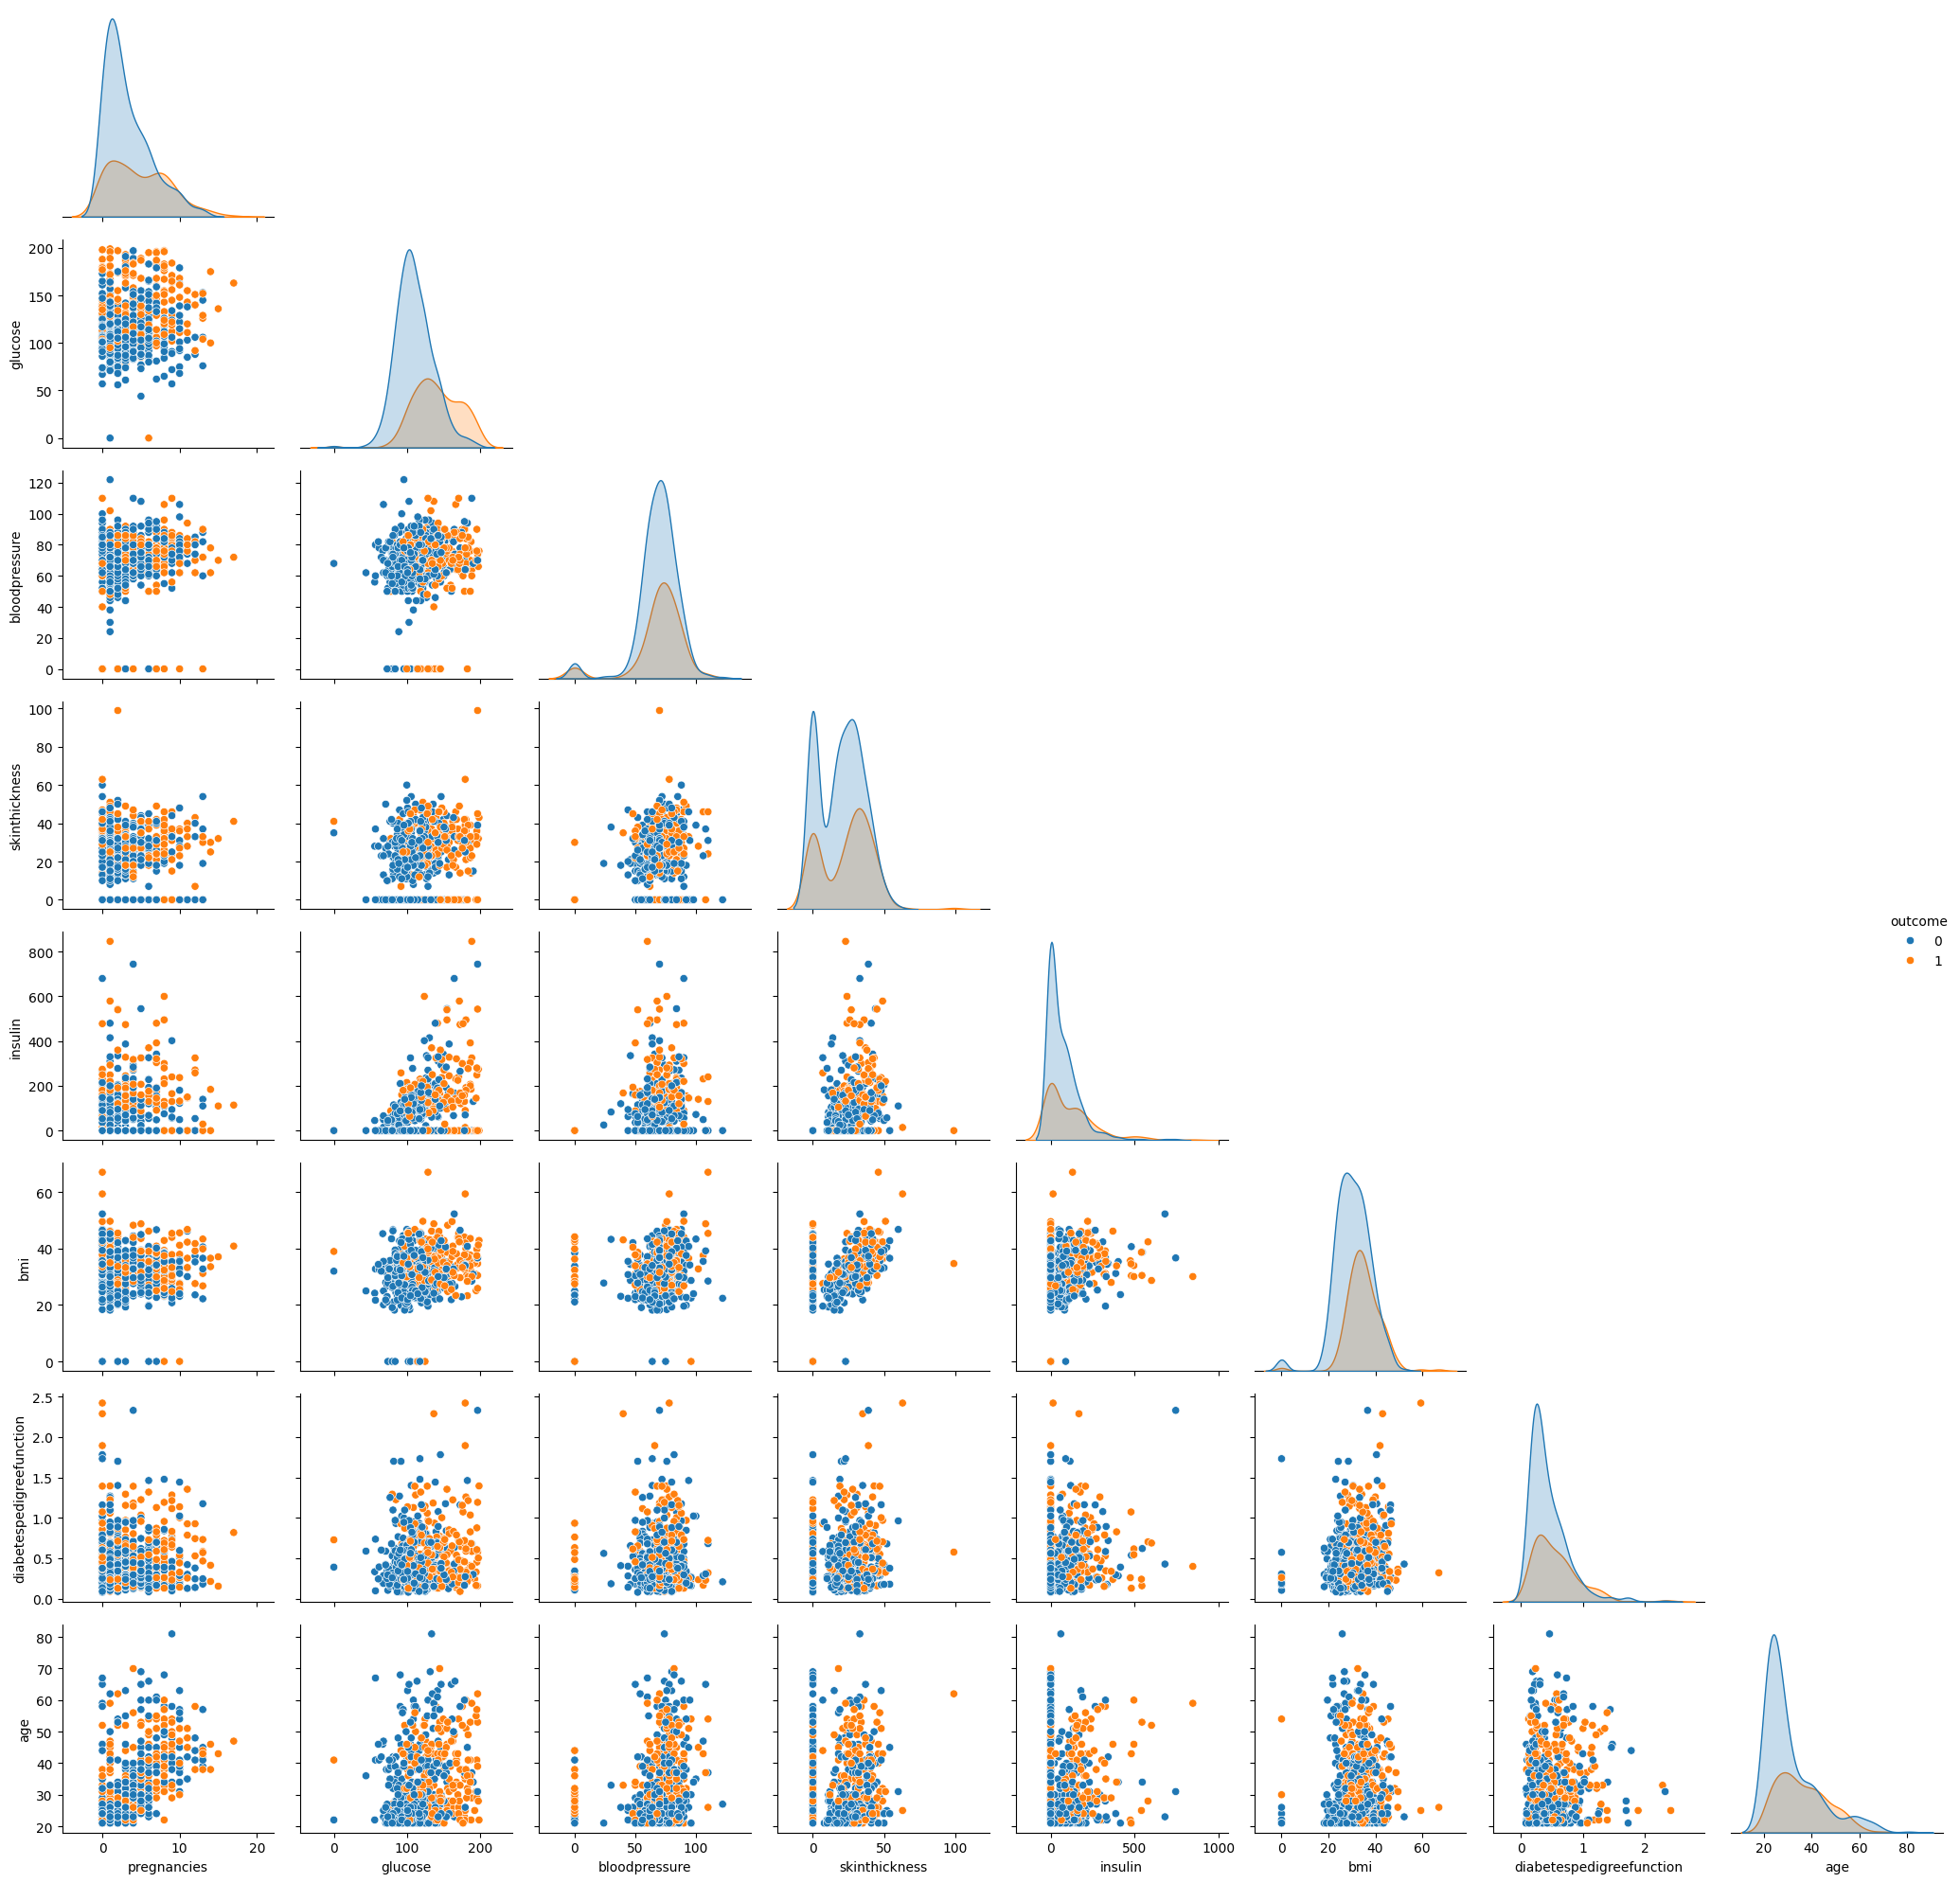

In [ ]:
sns.pairplot(data=df_train,hue='outcome', corner=True)
plt.tight_layout()
plt.show()

- Correalaciones

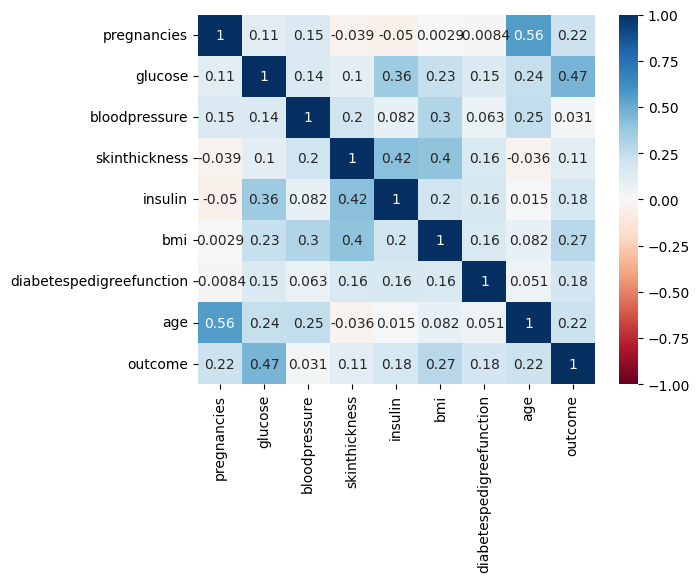

In [ ]:
sns.heatmap(data=df_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

## Paso 4: Machine Learning

In [11]:
X_train = df_train.drop(['outcome'],axis=1)
y_train = df_train['outcome']

X_test = df_test.drop(['outcome'],axis=1)
y_test = df_test['outcome']

display(X_train.head())
display(y_train.head())



,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,14,175,62,30,0,33.6,0.212,38
1,4,90,88,47,54,37.7,0.362,29
2,1,136,74,50,204,37.4,0.399,24
3,2,96,68,13,49,21.1,0.647,26
4,11,85,74,0,0,30.1,0.300,35


,outcome
0,1
1,0
2,0
3,0
4,0


### Decision Tree

In [12]:
clf_tree = RandomForestClassifier()
clf_tree.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_hat_tree = clf_tree.predict(X_test)
y_hat_tree

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

### Random Forest

In [14]:
clf_random_forest = RandomForestClassifier(n_estimators=35, random_state=2025)
clf_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=35, random_state=2025)

In [17]:
y_hat_forest = clf_random_forest.predict(X_test)
y_hat_forest

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

### Gradient Boosting

In [83]:
clf_gradient = XGBClassifier(n_estimators=30, random_state=2025)
clf_gradient.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=2025, ...)

In [84]:
y_hat_gradient = clf_gradient.predict(X_test)
y_hat_gradient

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [85]:
print(f"Accuracy Gradient Boosting: {accuracy_score(y_test, y_hat_gradient):.2f}")

Accuracy Gradient Boosting: 0.75


## Paso 5: Ajuste del modelo

In [20]:
clf_tree = DecisionTreeClassifier(
    class_weight="balanced", #Pondera ambas clases y le da mas peso a la clase minoritaria y menos peso a la mayoritaria
    max_depth=3 #Ajusta la cantidad de niveles a 3
    )
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [21]:
y_hat_tree = clf_tree.predict(X_test)
y_hat_tree

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

### Comparacion Decision Tree vs Random Forest vs Gradient Boosting

In [86]:
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_hat_tree):.2f}")
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_hat_forest):.2f}")
print(f"Accuracy Gradient Boosting: {accuracy_score(y_test, y_hat_gradient):.2f}")

Accuracy Decision Tree: 0.68
Accuracy Random Forest: 0.77
Accuracy Gradient Boosting: 0.75


## Paso 6: Guardar modelo entrenado

In [ ]:
with open("clf_boosting.pkl", "wb") as gradient_boosting01:
    pickle.dump(clf_tree, gradient_boosting01)

## Paso 7: Analisis

*Decision Tree*
- Accuracy: 0.68
- Menor precisión, tiende a sobreajustarse.

*Random Forest*
- Accuracy: 0.77
- Mejor precisión, combina múltiples árboles para reducir el sobreajuste.

*Gradient Boosting*
- Accuracy: 0.75
- Buena precisión, mejora corrigiendo errores de modelos anteriores.

En resumen, Random Forest es el modelo más preciso, seguido por Gradient Boosting y luego Decision Tree.